In [1]:
import pandas as pd
import numpy as np

In [13]:
df=pd.DataFrame(
    {'A':1,
     'b':pd.Timestamp('20120101'),
     
     "C": pd.Series(1, index=list(range(4)), dtype="float32"),
     "D": np.array([3] * 4, dtype="int32"),
     'E':pd.Categorical(['fail','kamyab','fail','train']),
     'F':'foo',})

In [14]:
df

,A,b,C,D,E,F
0,1,2012-01-01,1.0,3,fail,foo
1,1,2012-01-01,1.0,3,kamyab,foo
2,1,2012-01-01,1.0,3,fail,foo
3,1,2012-01-01,1.0,3,train,foo


# ploting

In [15]:
#now draw diff plots

import seaborn as sns
import  matplotlib.pyplot as plt


In [16]:
df=sns.load_dataset('titanic')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='survived', ylabel='count'>

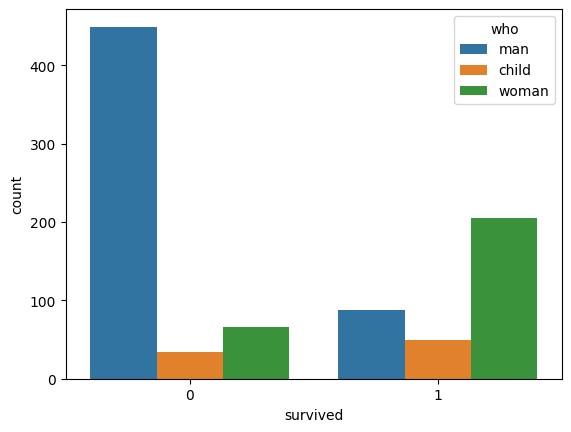

In [24]:
sns.countplot(x='survived',hue='who',data=df)

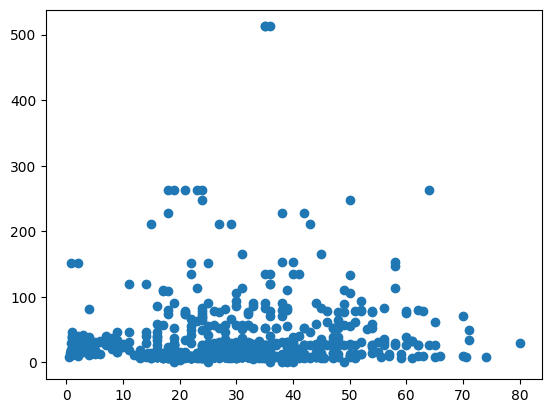

In [28]:
plt.scatter(x='age',data=df,y='fare')

<Axes: xlabel='age', ylabel='fare'>

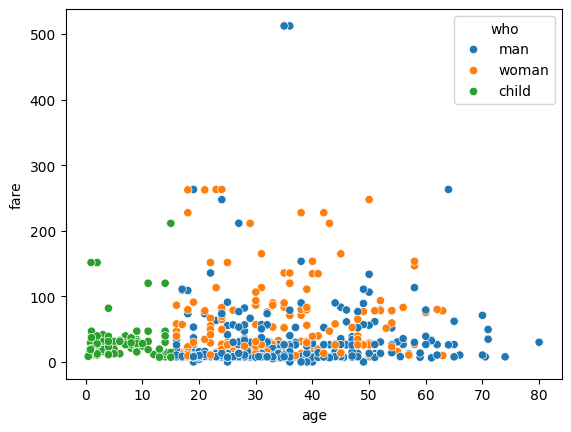

In [32]:
sns.scatterplot(data=df,x='age',y='fare',hue='who')

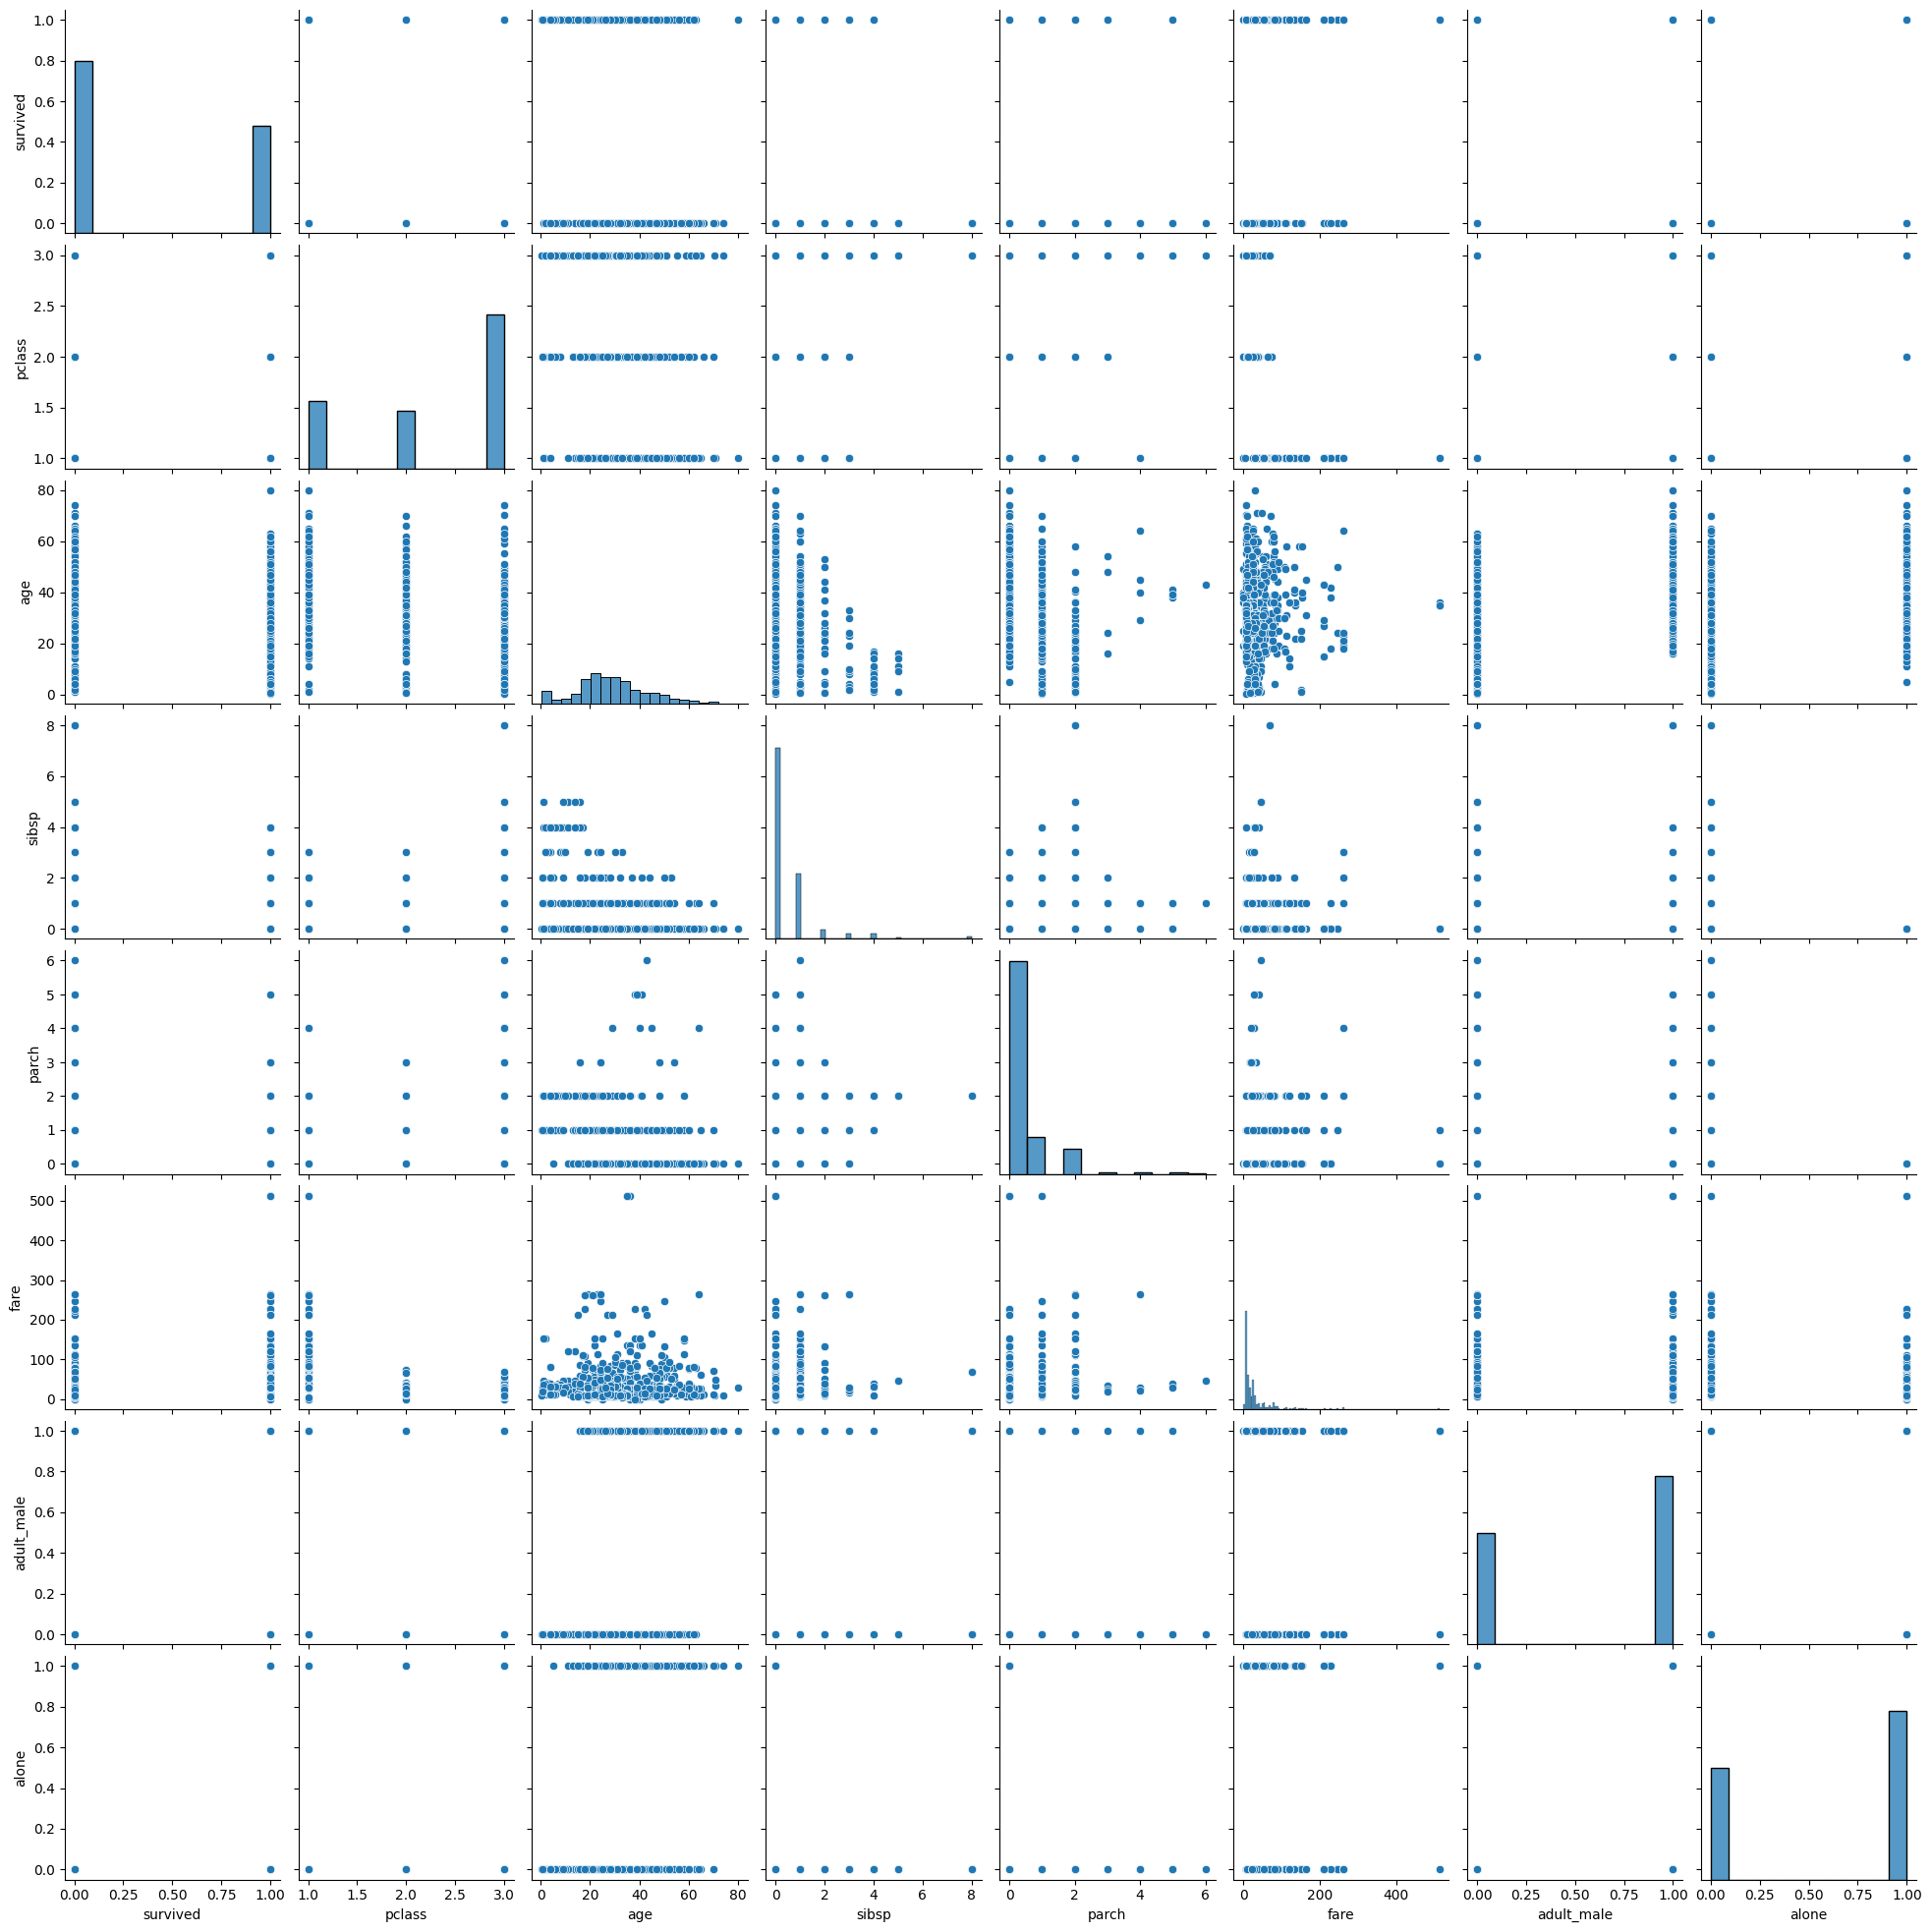

In [33]:
sns.pairplot(data=df)

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

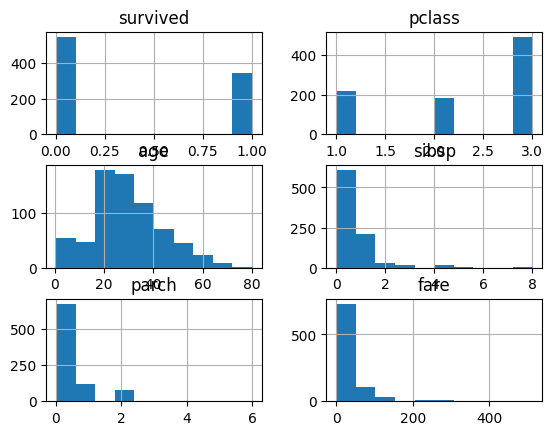

In [37]:
df.hist()

<Axes: xlabel='sex', ylabel='fare'>

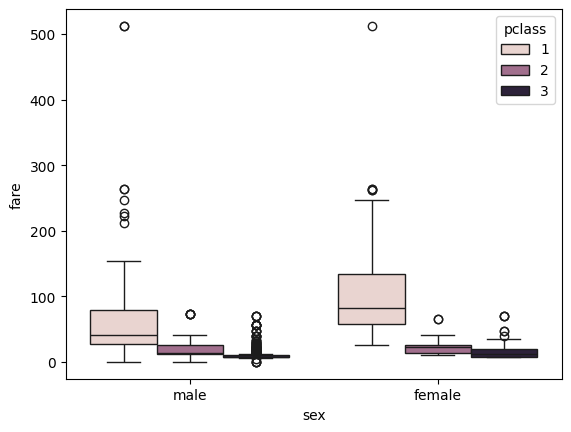

In [39]:
sns.boxplot(data=df,x='sex',y='fare',hue='pclass')

<Axes: xlabel='survived', ylabel='fare'>

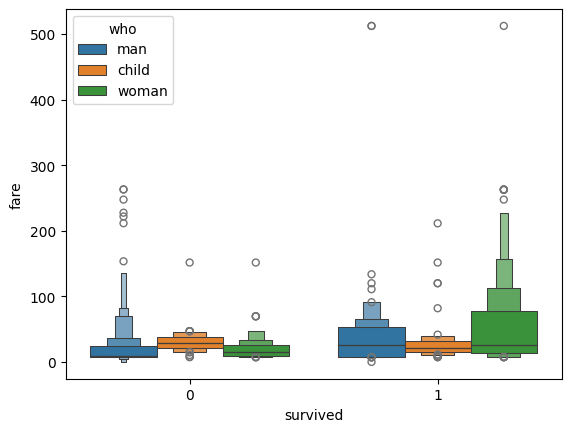

In [40]:
sns.boxenplot(data=df,x='survived',y='fare',hue='who')

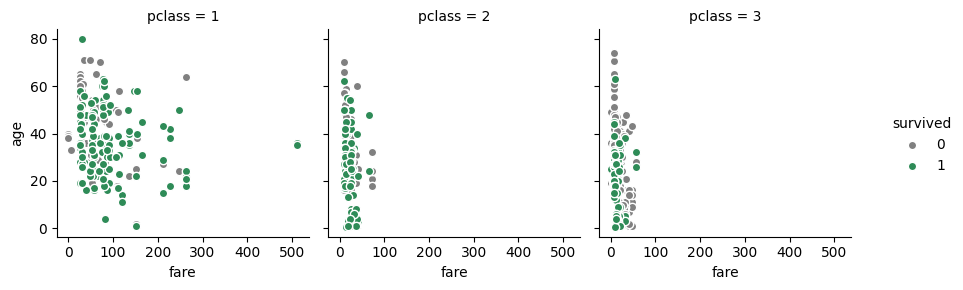

In [41]:
g=sns.FacetGrid(df,hue='survived',col='pclass',margin_titles=True,
                palette={1:'seagreen',0:'gray'})
g=g.map(plt.scatter,'fare','age',edgecolor='w').add_legend();

AttributeError: 'FacetGrid' object has no attribute 'add_lenged'

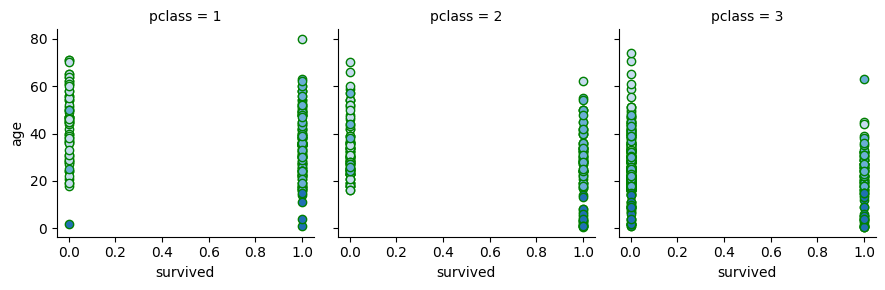

In [45]:
g=sns.FacetGrid(df,hue='who',col='pclass',margin_titles=True,
                palette='Blues')
g=g.map(plt.scatter,'survived','age',edgecolor='g').add_lenged();

In [48]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [50]:
corr=df.corr()
plt.figure(figsize={10,10})
sns.heatmap(corr)

ValueError: could not convert string to float: 'male'